In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import warnings

Coefficient of determination 0.01814642260182253
Mean squared error 1421.4104021215494


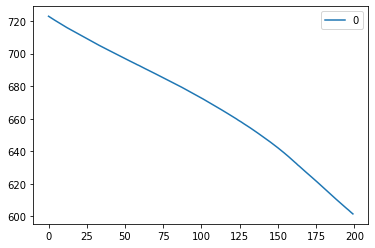

In [26]:
warnings.simplefilter('ignore') # So that we can ignore depreciation issues in Python.

def loss_curve_plot(nodes):
    # nodes            : Number of nodes to be provided for the hidden layer
    # return           : Nil
    #Creating an instance containing the functions of Multi-layer perceptron
    mlp = MLPRegressor(hidden_layer_sizes=(nodes,), random_state=1)
    #Using multi-layer perceptron (MLP) with a single hidden layer to fit a model to the training data
    mlp.fit(x_train, y_train)
    y_pred = mlp.predict(x_test)
    pd.DataFrame(mlp.loss_curve_).plot()
    print("Coefficient of determination {}".format(mlp.score(x_test, y_test)))
    print("Mean squared error {}".format(mean_squared_error(y_test, y_pred)))

if __name__ == '__main__':
    #Converting csv file info into a pandas dataframe
    df = pd.read_csv('regression2.csv', names=["observations1", "observations2", "response variable"])
    #Segregating the data from the pandas dataframe into input and output
    x = df.drop("response variable", axis=1)
    y = df["response variable"] 
    global x_train, x_test, y_train, y_test
    #Training and Testing sets using the module train_test_split
    #Cross validation resampling procedure used to evaluate machine learning models
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)
    #Plotting loss curve with 10 nodes
    loss_curve_plot(10) 
    #Each hidden node is responsible for some fraction of the error in each of the output node it connects 
    #Hence changing the count of node to reduce the variation observed

Coefficient of determination 0.586449130941264
Mean squared error 598.6895812348906


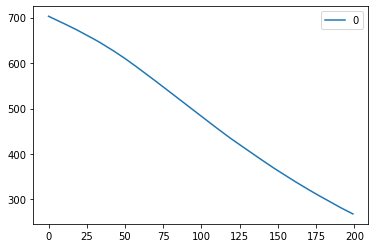

In [27]:
#Plotting loss curve with 100 nodes
loss_curve_plot(100)

Coefficient of determination 0.7290858456395868
Mean squared error 392.1971727294428


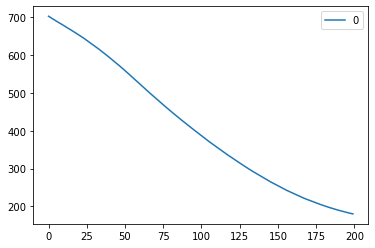

In [28]:
#Plotting loss curve with 100 nodes
loss_curve_plot(200)
#Checking with each increment of node count 
#Setting up node count by trial and error

Coefficient of determination 0.772397655746019
Mean squared error 329.4955043369575


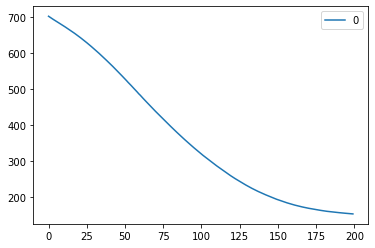

In [29]:
loss_curve_plot(300)

Coefficient of determination 0.7764075933679369
Mean squared error 323.6903953279783


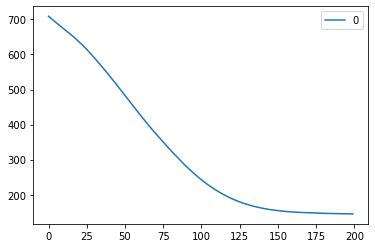

In [30]:
loss_curve_plot(500)

# Conclusion:
### We are able to observe that with less number of nodes the coefficient of determination is further away from 1. As we increase the node count the coefficient of determination keeps increasing towards 1 at the same time reducing the mean squared error which can be considered as the generalisation error. The node count i prefer to select is 500 as the loss curve seems to remain constant at that range.